In [1]:
import os
import torch
th = torch
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
from random import randint
InteractiveShell.ast_node_interactivity = "all"
torch.set_printoptions(precision=3, sci_mode=False)

# LOAD DATASET

In [104]:
import pickle
dfs = pickle.load(open('scaled_companies_data.pkl', 'rb'))

In [105]:
dfs

{'tesla':                close  close_nasdaq_composite  close_sp_500  close_dow_jones
 Date                                                                       
 2020-01-02  0.011927                0.232898      0.338239         0.484405
 2020-01-03  0.014130                0.225444      0.330615         0.473379
 2020-01-06  0.015604                0.230736      0.334404         0.476608
 2020-01-07  0.018631                0.230434      0.331388         0.470966
 2020-01-08  0.022618                0.236765      0.336648         0.478574
 ...              ...                     ...           ...              ...
 2024-04-08  0.385859                0.980354      0.982777         0.956891
 2024-04-09  0.395966                0.985852      0.985270         0.956461
 2024-04-10  0.382698                0.971629      0.968939         0.936562
 2024-04-11  0.390057                1.000000      0.981674         0.936448
 2024-04-12  0.380858                0.972122      0.956599        

In [108]:
pc_train = 0.2

names = list(dfs.keys())
T = len(dfs[names[0]])
n_train = int(pc_train * T)

dfs_train, dfs_test = {}, {}
for _name, _df in dfs.items():
    dfs_train[_name] = _df.iloc[:len(_df) - n_train]
    dfs_test[_name] = _df.iloc[len(_df) - n_train:]

n_train_per_company = len(dfs_train[_name])
n_test_per_company = len(dfs_test[_name])

print('# of Companies: {} | # of Price Points: {}'.format(len(names), T))
print('Companies: ')
print(names)
print('# to be assigned as train: {} | test: {}'.format(len(dfs_train[_name]), len(dfs_test[_name])))

# of Companies: 10 | # of Price Points: 1077
Companies: 
['tesla', 'salesforce', 'goldman_sachs', 'microsoft', 'delta_airlines', 'apple', 'visa', 'ford', 'dell', 'alphabet']
number to be assigned as train: 862 | test: 215


In [109]:
dfs[_name].index.strftime('%Y-%m-%d').tolist()

['2020-01-02',
 '2020-01-03',
 '2020-01-06',
 '2020-01-07',
 '2020-01-08',
 '2020-01-09',
 '2020-01-10',
 '2020-01-13',
 '2020-01-14',
 '2020-01-15',
 '2020-01-16',
 '2020-01-17',
 '2020-01-21',
 '2020-01-22',
 '2020-01-23',
 '2020-01-24',
 '2020-01-27',
 '2020-01-28',
 '2020-01-29',
 '2020-01-30',
 '2020-01-31',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-09',
 '2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-30',
 '2020-03-31',
 '2020-04-01',
 '2020-04-02',
 '2020-04-03',
 '2020-04-06',
 '2020-04-

In [110]:
dfs_test[_name].index.strftime('%Y-%m-%d').tolist()

['2023-06-06',
 '2023-06-07',
 '2023-06-08',
 '2023-06-09',
 '2023-06-12',
 '2023-06-13',
 '2023-06-14',
 '2023-06-15',
 '2023-06-16',
 '2023-06-20',
 '2023-06-21',
 '2023-06-22',
 '2023-06-23',
 '2023-06-26',
 '2023-06-27',
 '2023-06-28',
 '2023-06-29',
 '2023-06-30',
 '2023-07-03',
 '2023-07-05',
 '2023-07-06',
 '2023-07-07',
 '2023-07-10',
 '2023-07-11',
 '2023-07-12',
 '2023-07-13',
 '2023-07-14',
 '2023-07-17',
 '2023-07-18',
 '2023-07-19',
 '2023-07-20',
 '2023-07-21',
 '2023-07-24',
 '2023-07-25',
 '2023-07-26',
 '2023-07-27',
 '2023-07-28',
 '2023-07-31',
 '2023-08-01',
 '2023-08-02',
 '2023-08-03',
 '2023-08-04',
 '2023-08-07',
 '2023-08-08',
 '2023-08-09',
 '2023-08-10',
 '2023-08-11',
 '2023-08-14',
 '2023-08-15',
 '2023-08-16',
 '2023-08-17',
 '2023-08-18',
 '2023-08-21',
 '2023-08-22',
 '2023-08-23',
 '2023-08-24',
 '2023-08-25',
 '2023-08-28',
 '2023-08-29',
 '2023-08-30',
 '2023-08-31',
 '2023-09-01',
 '2023-09-05',
 '2023-09-06',
 '2023-09-07',
 '2023-09-08',
 '2023-09-

## Load BERT embedder

In [8]:
# from transformers import BertTokenizer, BertModel
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# embedder = BertModel.from_pretrained('bert-base-uncased')

from transformers import LongformerModel, AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained("allenai/longformer-base-4096")
embedder = LongformerModel.from_pretrained("allenai/longformer-base-4096")
max_token_n = 4096

# test model
text = 'TWEETS' * 1000
encoded_input = tokenizer(text, return_tensors='pt')
print(encoded_input.input_ids.shape)
_  = embedder(**encoded_input)

/Users/tamk/opt/anaconda3/envs/llm/lib/python3.8/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Input ids are automatically padded from 3002 to 3072 to be a multiple of `config.attention_window`: 512


torch.Size([1, 3002])


## Dataset generation methods

In [9]:
from sklearn.decomposition import PCA

def embed_by_bert(text):
    _tkn = tokenizer(text, return_tensors='pt') 
    if _tkn.input_ids.shape[-1] >= max_token_n:
        _tkn = _tkn[:,:max_token_n]
    _emb = embedder(**_tkn).last_hidden_state[:,0,:].detach().to(th.float32)
    return _emb

def embed_one_by_one(list_list_texts, text_to_emb_dict, embed_func=None):
    embs = []
    for _i, _txts in enumerate(list_list_texts):
        _embs = []
        for _txt in _txts:
            if _txt in text_to_emb_dict: 
                _emb = text_to_emb_dict.get(_txt)
            else:
                _emb = embed_func(_txt)
                text_to_emb_dict[_txt] = _emb
            _embs.append(_emb)
        embs.append(_embs)
    return embs

def embed_text(dataset, list_list_texts, apply_pca=True):
    unique_embs = dict()
    dataset.unique_embs = unique_embs

    list_list_embs_p_step = embed_one_by_one(list_list_texts, unique_embs, embed_by_bert)
    list_embs_p_company = [th.cat(_embs, dim=0) for _embs in list_list_embs_p_step]
    
    #print(unique_embs)
    
    if apply_pca is not None:
        apply_pca = {} if apply_pca is True else apply_pca
        n_components = apply_pca if isinstance(apply_pca, int) else apply_pca.get('n_components', 10)
        
        # create concatenated embedding
        unique_embs_txts, unique_embs_vals = list(zip(*unique_embs.items()))
        unique_embs_cat = th.cat(unique_embs_vals, dim=0)
        
        # apply PCA
        n_components = min(n_components, len(unique_embs_txts))
        pca = PCA(n_components=n_components)
        pca.fit(unique_embs_cat.numpy())
        
        #  transform
        unique_embs_pca_cat = th.tensor(pca.transform(unique_embs_cat))
        unique_embs_pca = dict(zip(unique_embs.keys(), th.split(unique_embs_pca_cat, 1)))
        dataset.unique_embs_pca = unique_embs_pca
        
        #print(unique_embs_pca)
        # recreate datastructure
        list_list_embs_p_step_pca = embed_one_by_one(list_list_texts, unique_embs_pca)
        list_embs_p_company = [th.cat(_embs, dim=0).to(th.float32) for _embs in list_list_embs_p_step_pca]

    return list_embs_p_company

In [405]:

import torch
from torch.utils.data import Dataset, DataLoader
import pickle

class StockDataset(Dataset):
    def __init__(self, data, 
                 input_window=4, output_window=1,
                 use_transformer=False, 
                 input_prices=['Close_x', 'Close_y'], output_prices=['Close_x'], 
                 include_text= False, apply_pca=10, # or False
                ):
        """
        Args:
        data (filepath of saved path)
        data (list of pd.DataFrame): List of dataframes, each containing columns:
                                          'time', 'stock price', 'stock index price', 'text message'
        input_window (int): Number of timesteps in each input sequence.
        output_window (int): Number of timesteps in each target sequence.
        
        """
        
        self.sequences = [] # store chunks (data point)
        self.sequences_raw = []   # store a company's entire time series sequence 
        self.sequences_raw_embs = [] # store a company's entire time series sequence (text embeddings including PCA if applied)
        self.unique_embs = {}
        self.unique_embs_pca = {}
        
        self.names = []
        self.dates = []
        
        self.apply_pca = apply_pca
        
        if use_transformer:
            output_window = 1
        
        if isinstance(data, str) and os.path.exists(data):
            self.sequences, self.sequences_raw, self.sequences_raw_embs, \
            self.unique_embs, self.unique_embs_pca = pickle.load(open(data, 'rb'))
        else:
            self.input_window = input_window
            self.output_window = output_window
        
            if include_text:
                all_texts = [_df[include_text].values.tolist() for _df in data]
                list_embs_p_company = self.embed_text(all_texts)

            for _i_df, (_name, df) in enumerate(data.items()):
                self.names.append(_name)
                if _i_df == 0:
                    self.dates = df.index.strftime('%Y-%m-%d').tolist()
                
                t = df[input_prices].shape[0]
                seq_in = th.tensor(df[input_prices].values).reshape(t,-1).to(th.float32)
                self.sequences_raw.append(seq_in)
                
                seq_tgt = th.tensor(df[output_prices].values).reshape(t,-1).to(th.float32)
                if include_text:
                    embs = list_embs_p_company[_i_df]
                    self.sequences_raw_embs.append(embs)

                num_sequences = t - self.input_window - self.output_window + 1

                for i in range(num_sequences):
                    input_start = i
                    input_end = i + self.input_window
                    
                    target_start = input_start + 1
                    target_end = input_end + 1

                    seq_in_ = [seq_in[input_start:input_end]]
                    if include_text:
                        seq_in_.append(embs[input_start:input_end])

                    seq_in_ = th.cat(seq_in_, dim=1)
                    seq_tgt_ = seq_tgt[target_start:target_end]
                    self.sequences.append((seq_in_, seq_tgt_, th.tensor([[_i_df, input_start, target_end]])))

    def embed_text(self, list_list_texts):
        return embed_text(self, list_list_texts, apply_pca=self.apply_pca)
    
    def save_dataset(self, filepath):
        pickle.dump([self.sequences, self.sequences_raw, self.sequences_raw_embs, 
                     self.unique_embs, self.unique_embs_pca], open(filepath, 'wb'))
        
    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        input_sequence, target_sequence, idx, = self.sequences[idx]
        return input_sequence, target_sequence, idx

    def get_sequence_from_index(self, index, embed_with_empty=False):
        i_company, i_start, _ = index.squeeze().tolist()
        seq = seq_vals = self.sequences_raw[i_company][i_start:].unsqueeze(0)
        len_seq = seq.shape[1]
        
        if self.unique_embs:
            if embed_with_empty:
                unique_embs = self.unique_embs_pca if self.apply_pca else self.unique_embs
                seq_emb = unique_embs[''].to(th.float32).unsqueeze(0).repeat(1, len_seq, 1)
            else:
                seq_emb = self.sequences_raw_embs[i_company][i_start:].unsqueeze(0)
            seq = th.cat((seq_vals, seq_emb), dim=2)
        return seq

    def get_sequence_by_name_date(self, name, date=None, embed_with_empty=False):
        i_company = self.names.index(name)
        i_start = self.dates.index(date) if date else 0
        
        seq = seq_vals = self.sequences_raw[i_company][i_start:].unsqueeze(0)
        len_seq = seq.shape[1]
        
        if self.unique_embs:
            if embed_with_empty:
                unique_embs = self.unique_embs_pca if self.apply_pca else self.unique_embs
                seq_emb = unique_embs[''].to(th.float32).unsqueeze(0).repeat(1, len_seq, 1)
            else:
                seq_emb = self.sequences_raw_embs[i_company][i_start:].unsqueeze(0)
            seq = th.cat((seq_vals, seq_emb), dim=2)
        return seq
        
    def get_sequences_from_index(self, index, n_future_steps=7, input_window=30, embed_with_empty=False):
        i_company, i_start, _ = index.squeeze().tolist()
        
        seq_raw = self.sequences_raw[i_company]
        len_seq_raw = seq_raw.shape[0]
        
        seqs = []
        for t in range(n_future_steps):
            _i_start = i_start + t + 1
            if _i_start + input_window > len_seq_raw:
                break
            _i_end = _i_start + input_window
            
            seq = seq_vals = seq_raw[_i_start:_i_end].unsqueeze(0)
    
            if self.unique_embs:
                if embed_with_empty:
                    unique_embs = self.unique_embs_pca if self.apply_pca else self.unique_embs
                    seq_emb = unique_embs[''].to(th.float32).unsqueeze(0).repeat(1, input_window, 1)
                else:
                    seq_emb = self.sequences_raw_embs[i_company][_i_start:_i_end].unsqueeze(0)
                seq = th.cat((seq_vals, seq_emb), dim=2)
            seqs.append(seq)

        seqs = th.cat(seqs, dim=0).unsqueeze(0)
        return seqs

    
    @property
    def input_dim(self):
        return self.sequences[0][0].shape[-1]
    @property
    def output_dim(self):
        return self.sequences[0][1].shape[-1]



In [406]:
dataset_train.__class__.get_sequences_from_index = get_sequences_from_index
th.cat(dataset_train.get_sequences_from_index(th.tensor([0, 0, 0])), dim=0).unsqueeze(0).shape

torch.Size([1, 7, 30, 4])

In [113]:
# debugging tool: ignore
def reduce(x, apply=False):
    if apply:
        return th.linalg.norm(x) 
    return x
    
def inspect_model(model, save_data=False, apply_reduce=False, show_grad=True):
    for name, param in model.named_parameters():
        if 'weight' in name:
            print(f"Layer: {name}")
            print("Weights:",reduce(param.data, apply_reduce))
            if isinstance(save_data, dict):
                save_data.setdefault('w', {})[name] = param.data
                save_data.setdefault('g', {})[name] = param.grad
            if show_grad:
                if param.grad is not None:
                    print("Gradients:", reduce(param.grad, apply_reduce))
                else:
                    print("Gradients: None (check if backward has been called and if the parameter requires gradients)")
            #break
            print('-'*80)


# DATASET

In [12]:
# pickle.dump(DATA, open(FILEPATH, 'wb'))

In [13]:
# DATA = pickle.load(open(FILEPATH, 'rb'))

## Important parameters

In [14]:
input_window = seq_length = 30  # e.g., 5 days input
output_window = 1  # e.g., 2 days to predict

## Fake Data (no longer valid)

In [306]:
# 
# # Example fake data generation

# np.random.seed(42)
# data_length = 10
# df1 = pd.DataFrame({
#     'time': pd.date_range(start='1/1/2020', periods=data_length, freq='D'),
#     'price_main': np.random.rand(data_length) * 100,
#     'price_sec': np.random.rand(data_length) * 1000,
#     'text': np.random.choice(['news', '', 'alert', 'none'], data_length)
# })

# df2 = pd.DataFrame({
#     'time': pd.date_range(start='1/1/2020', periods=data_length, freq='D'),
#     'price_main': np.random.rand(data_length) * 100,
#     'price_sec': np.random.rand(data_length) * 1000,
#     'text': np.random.choice(['announcement', 'report', 'alert', 'none'], data_length)
# })

# dataframes = [df1, df2]

* you will need to replace this with your own data
* each df relates to a company
* additionally, normalise your company's price data from 0 to 1
* the stock prices should be normalised the same way across all companies
* here 'price_main' and 'price_sec' represents 'stock' and 'stock index'


## Make dataset

* the dataset generator can be used to make data for different model architecture...
* you can have it predict from stock and index price, and output in stock price... you can also include index price in the output... adjust the output_prices accordingly

In [15]:
name_stock_indices = ['close_nasdaq_composite', 'close_sp_500', 'close_dow_jones']

input_prices = ['close'] + name_stock_indices
output_prices = ['close'] + name_stock_indices
text_column = None  #'Text'

apply_pca = 10  # only relevant when there are text embeddings

In [16]:
dataset_train = StockDataset(dfs_train, 
                             input_window, output_window, 
                             input_prices=input_prices, output_prices=output_prices, include_text=text_column,
                             apply_pca=apply_pca)
dataset_test = StockDataset(dfs_test, 
                            input_window, output_window, 
                            input_prices=input_prices, output_prices=output_prices, include_text=text_column,
                            apply_pca=apply_pca)

n_train = len(dataset_train)
n_test = len(dataset_test)
print("Dataset size (total): Train: {} & Test: {}".format(n_train, n_test))
print("Dataset size (per company): Train: {} & Test: {}".format(n_train_per_company, n_test_per_company))



Dataset size (total): Train: 8320 & Test: 1850
Dataset size (per company): Train: 862 & Test: 215


In [115]:
# example on how to get particular subsequence for date and company:
dataset_train.get_sequence_by_name_date('tesla', '2020-01-03')

tensor([[[0.014, 0.225, 0.331, 0.473],
         [0.016, 0.231, 0.334, 0.477],
         [0.019, 0.230, 0.331, 0.471],
         ...,
         [0.475, 0.651, 0.657, 0.682],
         [0.492, 0.666, 0.678, 0.715],
         [0.502, 0.665, 0.675, 0.706]]])

In [17]:
# example on how to get particular subsequence based on stored index:
dataset_train.get_sequence_from_index(th.tensor([0, 5, 0])).shape

torch.Size([1, 857, 4])

In [117]:
dataset_train[1]

(tensor([[0.014, 0.225, 0.331, 0.473],
         [0.016, 0.231, 0.334, 0.477],
         [0.019, 0.230, 0.331, 0.471],
         [0.023, 0.237, 0.337, 0.479],
         [0.021, 0.245, 0.344, 0.489],
         [0.020, 0.242, 0.341, 0.482],
         [0.028, 0.252, 0.348, 0.486],
         [0.031, 0.250, 0.347, 0.488],
         [0.027, 0.250, 0.349, 0.492],
         [0.026, 0.261, 0.358, 0.505],
         [0.026, 0.264, 0.362, 0.507],
         [0.032, 0.262, 0.359, 0.500],
         [0.036, 0.263, 0.359, 0.499],
         [0.036, 0.265, 0.361, 0.498],
         [0.035, 0.256, 0.351, 0.490],
         [0.034, 0.238, 0.334, 0.469],
         [0.036, 0.251, 0.344, 0.478],
         [0.038, 0.252, 0.343, 0.478],
         [0.048, 0.254, 0.347, 0.484],
         [0.050, 0.239, 0.328, 0.456],
         [0.072, 0.252, 0.335, 0.462],
         [0.091, 0.272, 0.351, 0.482],
         [0.065, 0.276, 0.364, 0.504],
         [0.067, 0.283, 0.367, 0.508],
         [0.067, 0.278, 0.361, 0.495],
         [0.071, 0.289, 0

In [ ]:
# if there is text... there will be an embedding corresponding to empty/no text:
dataset.unique_embs_pca[''].numel()

In [14]:
# to save
# dataset_train.save_dataset('file_name.p')

In [722]:
# dataset_train = StockDataset('file_name.p')

# MODELLING

In [400]:
output.shape

torch.Size([24, 30, 4])

In [391]:
_autoreg_out = model.autoregress(output, 3)[1]

In [402]:
# _autoreg_out = [_res[1] for _res in _autoreg_out]
th.stack(_autoreg_out, dim=2).shape

torch.Size([24, 30, 3, 4])

In [399]:

def eval_autoregress(model, output, target, criterion):
    output = th.stack(output, dim=2)
    target = th.stack(target, dim=2)
    loss = criterion(output, target)
    return loss


tensor(0.)

In [ ]:
# def autoregressive_predict_with_eval(model, initial_sequence,
#                                      indices, dataset, n_future_steps,
#                                      mode='eval', output_time=False):
    
#     tgt_p_s_p_data = [dataset.get_sequences_from_index(_idx, n_future_steps=n_future_steps) for _idx in idx]
#     steps_min = min([_tgt.shape[1] for _tgt in tgt_p_s_p_data])

    
#     tgt = th.cat([_tgt[:,:steps_min,:,:] for _tgt in tgt_p_s_p_data], dim=0)

#     # truth??
#     seq_future, seq_p_s = model.autoregressive_predict(model, initial_sequence, n_future_steps=steps_min, 
#                                                        truth=None, mode=mode, output_time=False)

#     out = th.stack(seq_p_s, dim=2)
#     pass


In [416]:

def autoregressive_predict(model, initial_sequence, n_future_steps, truth=None, 
                           mode='eval', output_time=True):
                           #with_text_embed=None):
    """
    Predict 'future_steps' into the future based on the 'initial_sequence' using the provided model.
    
    Args:
        model (nn.Module): The trained time series forecasting model.
        initial_sequence (torch.Tensor): The initial data sequence used for the first prediction, shape [1, seq_length, 1].
        future_steps (int): Number of future steps to predict.

        with_test_embed: text embedding: 2 options
          'empty': always feed in 'empty' for future
          'truth': feed in entire sequence of embedding beginning with first time step of input token

    Returns:
        torch.Tensor: Predicted values for 'future_steps', shape [1, future_steps, 1].
    """
    _ = model.eval() if mode == 'eval' else model.train()

    if initial_sequence.dim() == 1:
        initial_sequence = initial_sequence.unsqueeze(0).unsqueeze(2)
    elif initial_sequence.dim() == 2:
        initial_sequence = initial_sequence.unsqueeze(0)
    current_sequence = initial_sequence.clone().detach()
        
    dim_truth = 0
    dim_in = initial_sequence.shape[-1]
    if truth is not None:
        dim_truth = truth.shape[-1]
        
    len_inp = initial_sequence.shape[1]
    t = th.arange(len_inp).reshape(len_inp)
    #print('seq len: {} // dim in: {}'.format(len_inp, dim_in))
    
    all_sequences = []
    predictions = []
    
    for step in range(n_future_steps):
        # Predict the next step
        with torch.no_grad():
            next_value = model(current_sequence)
        dim_out = next_value.shape[-1]
        
        # Append the prediction
        predictions.append(next_value[:, -1, :].unsqueeze(1))
    
        # Update the current sequence for the next prediction
        if dim_out < dim_in:
            assert truth is not None # make sure truth is provided when output dim is different than input dim
            _next_value = next_value[:,-1,:].unsqueeze(1)
            _next_value_truth = truth[:, len_inp + step: len_inp + step + 1, dim_out:]
            #print(_next_value.shape, _next_value_truth.shape)
            next_value = th.cat((_next_value, _next_value_truth), dim=2)
            current_sequence = torch.cat((current_sequence[:,1:,:], next_value), dim=1)
        else:
            a, b = (current_sequence[:, 1:, :], next_value[:, -1, :input_dim].unsqueeze(1))
            current_sequence = torch.cat((a, b), dim=1)

        out = (t + step + 1, current_sequence) if output_time else current_sequence
        all_sequences.append(out)
    
    return torch.cat(predictions, dim=1), all_sequences


In [19]:
import torch
import torch.nn as nn
import numpy as np

class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_dim, output_dim, d_model, num_layers, dropout=0.1, apply_input_mask=None):
        super(TimeSeriesTransformer, self).__init__()
        self.d_model = d_model

        # Separate embeddings for input and output dimensions
        self.input_linear = nn.Linear(input_dim, d_model)
        self.output_linear = nn.Linear(d_model, output_dim)
        self.pos_encoder = PositionalEncoding(d_model, dropout)
        self.apply_input_mask = apply_input_mask

        # Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=4,  # Adjust number of heads as needed
            dim_feedforward=d_model * 4,
            dropout=dropout,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

    def forward(self, src, src_mask=None):
        if model.training and self.apply_input_mask is not None:  # look ahead mask; for transformer
            input_window = src.shape[1]
            n_tks_to_mask = randint(*self.apply_input_mask)
            mask = torch.ones(input_window, input_window).triu(diagonal=n_tks_to_mask)
 
        # src shape expected: [batch_size, seq_length, input_dim]
        src = self.input_linear(src)  # Transform input to feature space
        src *= torch.sqrt(torch.tensor(self.d_model, dtype=torch.float32))  # Scale input
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, src_mask)  # Pass through transformer
        output = self.output_linear(output)  # Map output to the target dimension
        return output

    autoregress = autoregressive_predict

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000, batch_first=True):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
        self.batch_first = batch_first
        if batch_first:
            pe = torch.zeros(1, max_len, d_model) # batch_first
            pe[0, :, 0::2] = torch.sin(position * div_term)
            pe[0, :, 1::2] = torch.cos(position * div_term)
        else:
            pe = torch.zeros(max_len, 1, d_model) # batch_first
            pe[:, 0, 0::2] = torch.sin(position * div_term)
            pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # print(x.shape)
        if self.batch_first:
            x = x + self.pe[:,:x.size(1),:]
        else:
            x = x + self.pe[x.size(0),:,:]
        return x

In [20]:
class TimeSeriesLSTM(nn.Module):
    def __init__(self, input_dim=1, output_dim=1, d_model=50, num_layers=2):
        super(TimeSeriesLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, d_model, batch_first=True, num_layers=num_layers)
        self.fc = nn.Linear(d_model, output_dim)
    def forward(self, x, **kwargs):
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out)
        return output
    autoregress = autoregressive_predict

In [21]:
# OLD
# class TimeSeriesTransformer(nn.Module):
#     def __init__(self, input_dim, output_dim, d_model, nhead, num_encoder_layers, dim_feedforward, dropout=0.1):
#         super(TimeSeriesTransformer, self).__init__()
#         self.input_linear = nn.Linear(input_dim, d_model)
#         self.pos_encoder = PositionalEncoding(d_model, dropout)
#         encoder_layers = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward, dropout, batch_first=True)
#         self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_encoder_layers)
#         self.output_linear = nn.Linear(d_model, output_dim)

#     def forward(self, src):
#         #print(src.dtype)
#         src = self.input_linear(src)  # [batch_size, seq_len, d_model]
#         src = self.pos_encoder(src)
#         output = self.transformer_encoder(src)
#         output = self.output_linear(output)
#         return output

#     def init_weights(self):
#         for name, param in self.named_parameters():
#             if 'weight' in name:
#                 if param.dim() > 1:
#                     nn.init.kaiming_normal_(param, mode='fan_out', nonlinearity='relu')
#                 elif 'norm' in name:
#                     nn.init.constant_(param, 1)
#             elif 'bias' in name:
#                 nn.init.constant_(param, 0)

#         # Optionally set a different initialization for embeddings if needed


## Key Model Parameters

In [45]:
# Parameters
input_dim = dataset_train.input_dim # dim_1
output_dim = dataset_train.output_dim   # dim_2
d_model = 32  # Size of the embedding

model_type = 'transformer' # or 'lstm'

# for both models
num_layers = 3

# only for transformers
apply_input_mask = (2, 5) # make sure upper limit is lower than input_window
dim_feedforward = 256
nhead = 4

if model_type == 'lstm':
    learning_rate = 0.01
elif model_type == 'transformer':
    learning_rate = 0.0001

In [118]:
print('Current dim: input {} output {}'.format(input_dim, output_dim))

Current dim: input 4 output 4



### Create fake model & data to test

In [379]:
model.autoregress(output, 7)[1]

[(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
          19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
  tensor([[[0.625, 0.645, 0.676, 0.693],
           [0.610, 0.697, 0.671, 0.702],
           [0.640, 0.703, 0.697, 0.729],
           ...,
           [0.605, 0.760, 0.751, 0.766],
           [0.606, 0.799, 0.770, 0.767],
           [0.610, 0.785, 0.754, 0.775]],
  
          [[0.687, 0.477, 0.554, 0.597],
           [0.708, 0.492, 0.559, 0.606],
           [0.694, 0.506, 0.562, 0.617],
           ...,
           [0.611, 0.407, 0.468, 0.517],
           [0.571, 0.379, 0.443, 0.520],
           [0.580, 0.380, 0.444, 0.515]],
  
          [[0.153, 0.462, 0.387, 0.453],
           [0.168, 0.449, 0.390, 0.440],
           [0.154, 0.409, 0.365, 0.419],
           ...,
           [0.171, 0.514, 0.411, 0.479],
           [0.174, 0.514, 0.421, 0.482],
           [0.174, 0.509, 0.416, 0.483]],
  
          ...,
  
          [[0.691, 0.688, 0.584, 0.676],
 

In [47]:
# Model Test
if model_type == 'transformer':
    model = TimeSeriesTransformer(input_dim, output_dim, d_model, num_layers, apply_input_mask = apply_input_mask)
elif model_type == 'lstm':
    model  = TimeSeriesLSTM(input_dim, output_dim, d_model, num_layers)

# Forward pass with dummy data
# input_data = torch.randn(8, seq_length, input_dim)  
# target_data = torch.randn(8, seq_length, input_dim)  
# Forward pass with real data
input_data = dataset_train[0][0].unsqueeze(0)

model.eval()
print ('testing ')
output = model(input_data)
print ('testing autoregress...')
model.autoregress(output, 7)[0]
print(input_data.shape, output.shape)  # Should be torch.Size([batch_size, seq_len, output_dim])

# model.init_weights()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

TimeSeriesTransformer(
  (input_linear): Linear(in_features=4, out_features=32, bias=True)
  (output_linear): Linear(in_features=32, out_features=4, bias=True)
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=32, out_features=32, bias=True)
        )
        (linear1): Linear(in_features=32, out_features=128, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=128, out_features=32, bias=True)
        (norm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
)

testing 
testing autoregress...


tensor([[[ 0.207, -0.384,  0.044, -0.911],
         [ 0.157, -0.028, -0.053, -0.753],
         [ 0.016,  0.095,  0.057, -0.460],
         [-0.126,  0.029,  0.164, -0.384],
         [-0.109, -0.025,  0.142, -0.491],
         [-0.039,  0.013,  0.100, -0.587],
         [ 0.004,  0.076,  0.069, -0.590]]])

torch.Size([1, 30, 4]) torch.Size([1, 30, 4])


# Training Prep

In [48]:
# Model loss
# symmetrical mean absolute percentage error
def SMAPELoss(output, target,tol=1e-4):
    denominator = (torch.abs(target) + torch.abs(output) + tol) / 2
    diff = torch.abs(output - target) / denominator
    diff[denominator == 0] = 0.0  # Handle the case to avoid division by zero
    smape = torch.mean(diff)
    return smape


In [49]:
batch_size = 24   # make bigger
epochs = 100

In [50]:
# Create data loader

dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
dataloader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)


In [29]:
criterion = SMAPELoss
# criterion = nn.MSELoss()

In [51]:
from torch.nn.utils import clip_grad_norm_

# Training and Testing Loop
losses = {}

debug_data_save = False
data = []
data_test = []

for epoch in range(epochs):

    loss_e_train = 0.
    _data = [] 
    _ = model.train()
    for batch, (src, tgt, idx) in enumerate(dataloader_train):
        
        optimizer.zero_grad()
        output = model(src)

        loss = criterion(output, tgt)
        
        if debug_data_save:
            _data.append((src, output.detach(), tgt))
        
        loss.backward()
        _ = clip_grad_norm_(model.parameters(), max_norm=1.) 
        optimizer.step()
        loss_e_train += loss.detach().item()

    data.append(_data)
    loss_e_train /= batch
    losses.setdefault('train', {})[epoch]=loss_e_train
    
    loss_e_test = 0
    _ = model.eval()
    with torch.no_grad():
        for batch, (src, tgt, idx) in enumerate(dataloader_test):
            _data = []
            output = model(src)
            loss = criterion(output, tgt)
            loss_e_test += loss.item()
            if debug_data_save:
                _data.append((src, output.detach(), tgt))
        data_test.append(_data)
    loss_e_test /= batch
    losses.setdefault('test', {})[epoch]=loss_e_test
    
    print(f"Epoch {epoch+1}, Training Loss: {loss_e_train}, Testing Loss: {loss_e_test}")
    #break

Epoch 1, Training Loss: 0.3948916176796993, Testing Loss: 0.050449474896122885
Epoch 2, Training Loss: 0.11336063800347333, Testing Loss: 0.03724119913848964
Epoch 3, Training Loss: 0.08759794328254082, Testing Loss: 0.03153624049351587
Epoch 4, Training Loss: 0.07531480482547959, Testing Loss: 0.029318979614740844
Epoch 5, Training Loss: 0.06805693382946397, Testing Loss: 0.025126178156245838
Epoch 6, Training Loss: 0.06297628583677242, Testing Loss: 0.02346032928046468
Epoch 7, Training Loss: 0.059298274123427495, Testing Loss: 0.021030664710061892
Epoch 8, Training Loss: 0.05643070349200612, Testing Loss: 0.021218975219730433
Epoch 9, Training Loss: 0.054176939317601265, Testing Loss: 0.019564155948820054
Epoch 10, Training Loss: 0.05241748905401526, Testing Loss: 0.018236153674396603
Epoch 11, Training Loss: 0.050883886495852744, Testing Loss: 0.017473463295632367
Epoch 12, Training Loss: 0.0497253744383854, Testing Loss: 0.01878996563518976
Epoch 13, Training Loss: 0.0487816236870

KeyboardInterrupt: 

# VISUALISATION

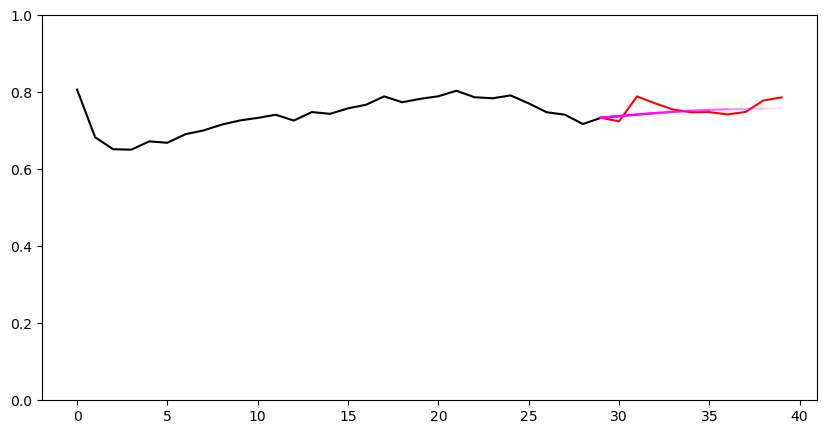

In [411]:
import matplotlib.pyplot as plt
from math import pow

def visualize_forecast(seq_to_test_pred_per_step, seq_to_test_truth):
    seq_to_test_truth = seq_to_test_truth[0,:,0]
    len_seq_truth = seq_to_test_truth.shape[-1]
    
    seq_len_pred = len(seq_to_test_pred_per_step)

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)

    i_truth_end = min(input_window+seq_len_pred, len_seq_truth)
    ax.plot(th.arange(input_window).tolist(), seq_to_test_truth[:input_window], c='black')
    ax.plot(th.arange(input_window-1,i_truth_end), seq_to_test_truth[input_window-1:i_truth_end], c='red')
    
    for _step, (_t, _seq) in enumerate(seq_to_test_pred_per_step):
        _seq = _seq[0,:,:1]  # only show stock price (first dimension of output)
        _is_future = _t >= (input_window - 1)
        _ = ax.plot(_t[_is_future], _seq[_is_future], c='magenta', alpha=pow(0.8, _step))

    ax.set_ylim(0, 1)
    plt.show()
visualize_forecast(seq_to_test_pred_per_step, seq_to_test_truth)

# INSPECTION

## Using the model

In [459]:
dataloader_test_shuffled = DataLoader(dataset_test, batch_size=1, shuffle=True)
seq_to_test = next(iter(dataloader_test_shuffled))
#seq_to_test = dataset_test[0] # a random test dataset point

n_future_steps = 10 # how many steps to forecast into the future
use_empty_text = True   # future text is assumed to be empty if True; otherwise, use true text from future

seq_to_test_idx = seq_to_test[2].squeeze() # get the index
print("Test data point information: company: {} & time: {}".format(seq_to_test_idx[0].item(), seq_to_test_idx[1].item()))
print(dataset_test.names[seq_to_test_idx[0].item()], dataset_test.dates[seq_to_test_idx[1].item()])

# get the corresponding raw data sequence from the dat/aset beginning from the start of this subsequence
seq_to_test_truth = dataset_test.get_sequence_from_index(seq_to_test_idx, use_empty_text) 
seq_to_test_input = seq_to_test[0]

#run model autoregressively
seq_to_test_pred, seq_to_test_pred_per_step =  model.autoregress(seq_to_test_input, n_future_steps, truth=seq_to_test_truth,
                                                                )

Test data point information: company: 1 & time: 99
salesforce 2023-10-26


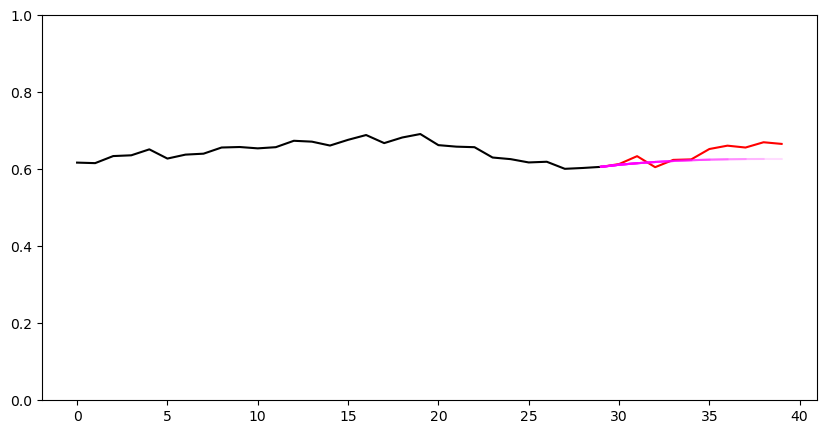

In [458]:
visualize_forecast(seq_to_test_pred_per_step, seq_to_test_truth)


In [438]:
seq_to_test_pred

tensor([[[0.386, 0.977, 0.967, 0.966],
         [0.387, 0.967, 0.958, 0.960],
         [0.387, 0.960, 0.953, 0.955],
         [0.387, 0.955, 0.950, 0.951],
         [0.386, 0.951, 0.948, 0.948],
         [0.385, 0.947, 0.945, 0.945],
         [0.384, 0.945, 0.944, 0.942],
         [0.383, 0.942, 0.943, 0.940],
         [0.381, 0.940, 0.942, 0.939],
         [0.380, 0.937, 0.941, 0.937]]])

In [124]:
seq_to_test_pred_per_step

[(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
          19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
  tensor([[[0.859, 0.912, 0.897, 0.933],
           [0.865, 0.913, 0.901, 0.939],
           [0.871, 0.928, 0.914, 0.947],
           [0.866, 0.932, 0.915, 0.949],
           [0.863, 0.953, 0.925, 0.946],
           [0.892, 0.948, 0.923, 0.952],
           [0.844, 0.918, 0.900, 0.928],
           [0.841, 0.939, 0.916, 0.935],
           [0.867, 0.944, 0.926, 0.951],
           [0.864, 0.930, 0.918, 0.944],
           [0.864, 0.915, 0.908, 0.941],
           [0.877, 0.910, 0.910, 0.944],
           [0.884, 0.958, 0.945, 0.965],
           [0.886, 0.954, 0.945, 0.968],
           [0.884, 0.951, 0.939, 0.965],
           [0.886, 0.958, 0.942, 0.961],
           [0.894, 0.948, 0.939, 0.960],
           [0.880, 0.963, 0.948, 0.962],
           [0.876, 0.983, 0.961, 0.966],
           [0.891, 0.976, 0.959, 0.961],
           [0.886, 0.948, 0.942, 0.942

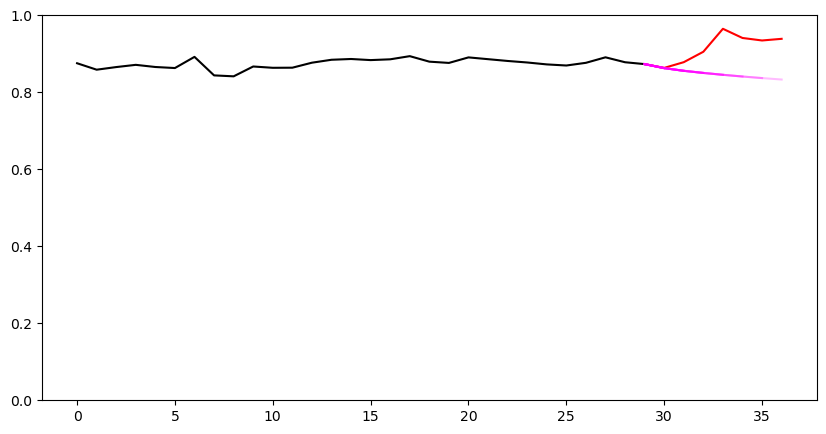